SVM steps : Loading Dataset

1)Download Dataset from here: htttps://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
2)Browse into the working directory, save the .csv data file into the directory,
3)Open Jupyter notebook>
 import pandas and numpy
 load the data using read_csv("location of the file",column headers and seperators)
4)Visualise your data using matplotlib 
import libraries matplotlib and math 
plot and visualize the data for better understanding
5)Use sklearn preprocessing library for encoding labels to numeric values since it becomes easier to process the data for columns Occupation and Target

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('adult.csv', names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status", "Occupation", "Relationship", "Race", "Gender", "Capital-Gain", "Capital-Loss", "Hours-per-week", "Country", "Target"], sep=r'\s*,\s*', engine="python", na_values="?")

In [3]:
df.Age[0]

'ï»¿39'

age [0] was showing error hence we need to change it

In [4]:
df.at[0,'Age']= 39

In [5]:
df.Age[0]

39

In [6]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-per-week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
import matplotlib.pyplot as plt
import math           #to perform mathematical operations
%matplotlib inline    

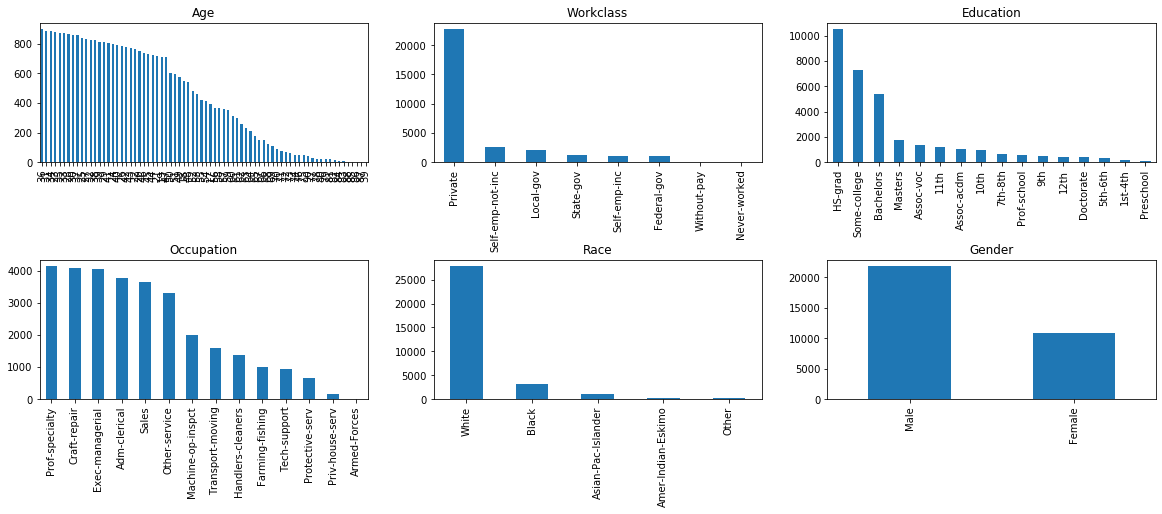

In [8]:
fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(df.shape[1])/cols)

for i, column in enumerate(["Age", "Workclass", "Education", "Occupation", "Race", "Gender"]):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()


In [9]:
import sklearn.preprocessing as preprocessing 

In [10]:
le = preprocessing.LabelEncoder()
df["Occupation"] = le.fit_transform(df["Occupation"].astype(str))

In [11]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-per-week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df["Target"] = le.fit_transform(df["Target"].astype(str))

In [13]:
df.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-per-week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [14]:
df.Target.unique()

array([0, 1])

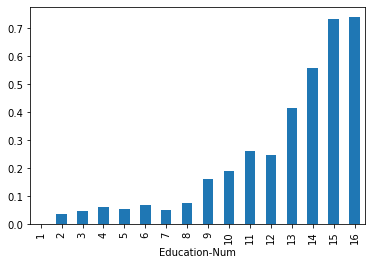

In [15]:
df.groupby("Education-Num").Target.mean().plot(kind="bar")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

# taking only important features
x = df[['Education-Num', 'Occupation']]
y = df['Target']

# splitting into 80% 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.svm import SVC

# Declaring the SVC with no tuning
classifier = SVC()

# fitting the data
classifier.fit(x_train, y_train)

# predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7861200675571933


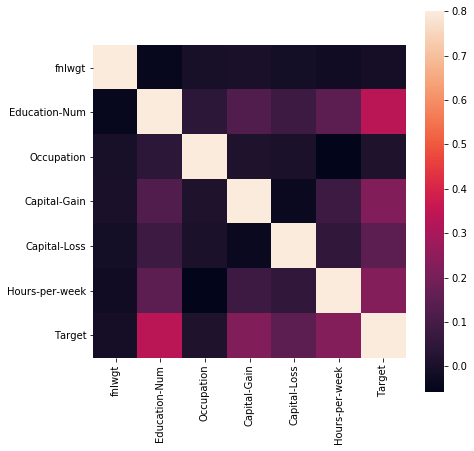

In [19]:
# correlation matrix
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Note - above correlation matrix is not able show all the points due to data in conversion hence we need to convert non numeric data points into numeric ones

In [25]:
# converting non numeric into numeric ones

df['Race'] = le.fit_transform(df['Race'].astype(str))
df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['Marital-Status'] = le.fit_transform(df['Marital-Status'].astype(str))
df['Education'] = le.fit_transform(df['Education'].astype(str))

plotting again after converion

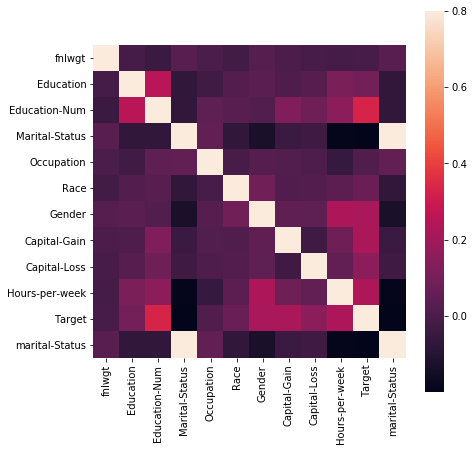

In [26]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

This is much better

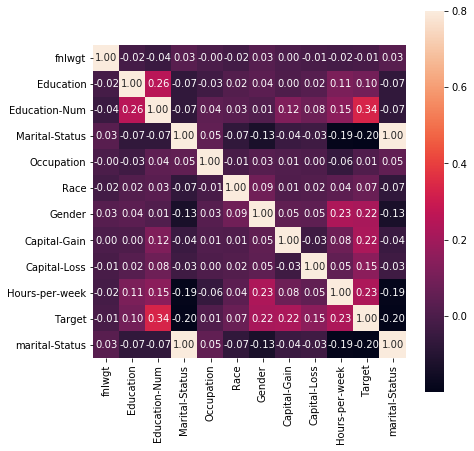

In [29]:
# to get the actual correlation values
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

Playing with features to get good accuracy score

In [30]:
# resetting features
x = df[["Education-Num", "Occupation", "Age"]]
y = df["Target"]

# splitting and training testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

print(score)

0.7858129894058038


including gender

In [31]:
x = df[["Education-Num", "Occupation", "Age", "Gender"]]
y = df["Target"]

# splitting and training testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

print(score)

0.7953324120988792


In [32]:
# setting our kernel to Radial Basis Function with penalty parameter C=1.0
classifier = SVC(kernel='rbf', C=1.0)
classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test)
print(score)

0.7953324120988792


In [34]:
# playing with penalty parameter C
classifier = SVC(kernel='rbf', C=10.0)
classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test)
print(score)

0.7968678028558268
